In [28]:
import pandas as pd
import os

In [29]:
dataset_path = "Datasets/sdc2023/"
print(dataset_path)

Datasets/sdc2023/


In [30]:
def load_ground_truth(drive_id, phone_name):
    file_path = os.path.join(dataset_path, "train", drive_id, phone_name, "ground_truth.csv")
    return pd.read_csv(file_path)

In [31]:
def load_gnss_data(drive_id, phone_name):
    file_path = os.path.join(dataset_path, "train", drive_id, phone_name, "device_gnss.csv")
    return pd.read_csv(file_path)

In [32]:
def load_imu_data(drive_id, phone_name):
    file_path = os.path.join(dataset_path, "train", drive_id, phone_name, "device_imu.csv")
    return pd.read_csv(file_path)

In [33]:
drive_ids = os.listdir(os.path.join(dataset_path, "train"))
phone_names = os.listdir(os.path.join(dataset_path, "train", drive_ids[0]))


In [34]:
selected_drive_id = drive_ids[0]
selected_phone_name = phone_names[0]

In [35]:
ground_truth_data = load_ground_truth(selected_drive_id, selected_phone_name)
gnss_data = load_gnss_data(selected_drive_id, selected_phone_name)
imu_data = load_imu_data(selected_drive_id, selected_phone_name)

In [36]:
print("Ground Truth Data:")
print(ground_truth_data.head())

Ground Truth Data:
  MessageType Provider  LatitudeDegrees  LongitudeDegrees  AltitudeMeters  \
0         Fix       GT        37.371197       -122.047715        9.706630   
1         Fix       GT        37.371197       -122.047715        9.706630   
2         Fix       GT        37.371197       -122.047715        9.706629   
3         Fix       GT        37.371197       -122.047715        9.706630   
4         Fix       GT        37.371197       -122.047715        9.706630   

   SpeedMps  AccuracyMeters  BearingDegrees  UnixTimeMillis  SpeedAccuracyMps  \
0  0.001000             0.1       279.78412   1629837161437               NaN   
1  0.001000             0.1       279.78406   1629837162437               NaN   
2  0.001000             0.1       279.78406   1629837163437               NaN   
3  0.001000             0.1       -80.21601   1629837164437               NaN   
4  0.000627             0.1       279.78400   1629837165437               NaN   

   BearingAccuracyDegrees  elap

In [37]:
print("\nGNSS Data:")
print(gnss_data.head())


GNSS Data:
  MessageType  utcTimeMillis      TimeNanos  LeapSecond  TimeUncertaintyNanos  \
0         Raw  1629837160437  9567293000000          18                   NaN   
1         Raw  1629837160437  9567293000000          18                   NaN   
2         Raw  1629837160437  9567293000000          18                   NaN   
3         Raw  1629837160437  9567293000000          18                   NaN   
4         Raw  1629837160437  9567293000000          18                   NaN   

         FullBiasNanos  BiasNanos  BiasUncertaintyNanos  DriftNanosPerSecond  \
0 -1313862811144299470  -0.216036             19.591458            -1.037198   
1 -1313862811144299470  -0.216036             19.591458            -1.037198   
2 -1313862811144299470  -0.216036             19.591458            -1.037198   
3 -1313862811144299470  -0.216036             19.591458            -1.037198   
4 -1313862811144299470  -0.216036             19.591458            -1.037198   

   DriftUncertaintyN

In [38]:
print("\nIMU Data:")
print(imu_data.head())


IMU Data:
  MessageType  utcTimeMillis  elapsedRealtimeNanos  MeasurementX  \
0  UncalAccel  1629837160823                   NaN     -0.008375   
1  UncalAccel  1629837160832                   NaN     -0.017946   
2  UncalAccel  1629837160842                   NaN     -0.017946   
3    UncalMag  1629837160844                   NaN    109.037500   
4  UncalAccel  1629837160852                   NaN     -0.017946   

   MeasurementY  MeasurementZ      BiasX      BiasY      BiasZ  
0      9.801002     -1.496112   0.000000   0.000000   0.000000  
1      9.872188     -1.573281   0.000000   0.000000   0.000000  
2      9.872188     -1.573281   0.000000   0.000000   0.000000  
3    -84.862500     31.487501  71.275276 -44.735287  27.316496  
4      9.872188     -1.573281   0.000000   0.000000   0.000000  


In [39]:
import matplotlib.pyplot as plt

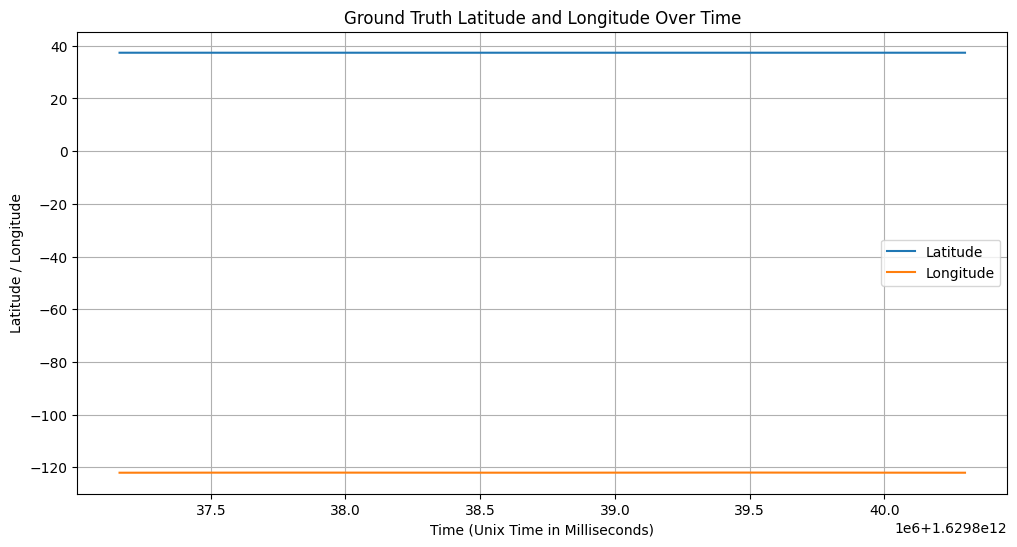

In [40]:
# Plot ground truth data
plt.figure(figsize=(12, 6))
plt.plot(ground_truth_data['UnixTimeMillis'], ground_truth_data['LatitudeDegrees'], label='Latitude')
plt.plot(ground_truth_data['UnixTimeMillis'], ground_truth_data['LongitudeDegrees'], label='Longitude')
plt.xlabel('Time (Unix Time in Milliseconds)')
plt.ylabel('Latitude / Longitude')
plt.title('Ground Truth Latitude and Longitude Over Time')
plt.legend()
plt.grid()
plt.show()

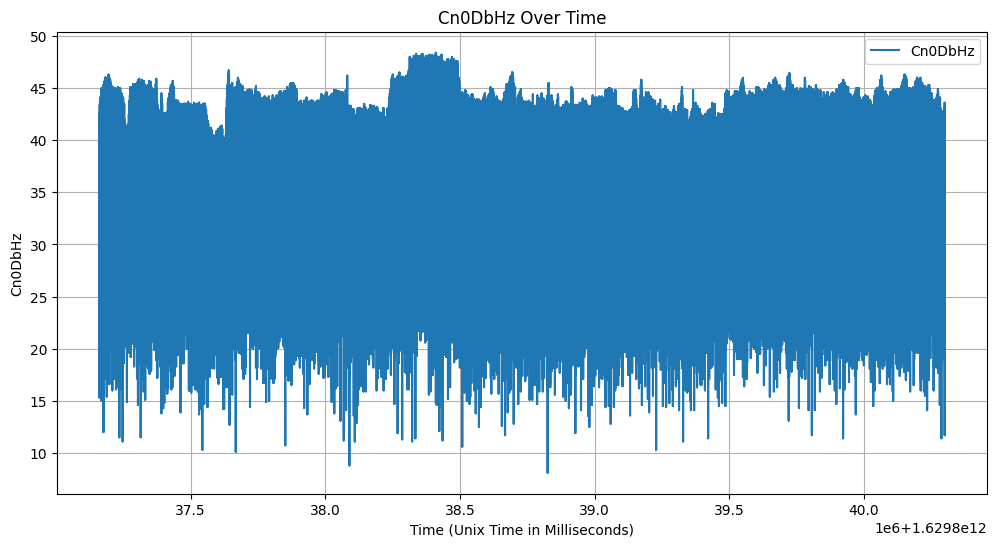

In [42]:
# Plot GNSS data (you may want to choose specific columns for plotting)
plt.figure(figsize=(12, 6))
plt.plot(gnss_data['utcTimeMillis'], gnss_data['Cn0DbHz'], label='Cn0DbHz')
plt.xlabel('Time (Unix Time in Milliseconds)')
plt.ylabel('Cn0DbHz')
plt.title('Cn0DbHz Over Time')
plt.legend()
plt.grid()
plt.show()

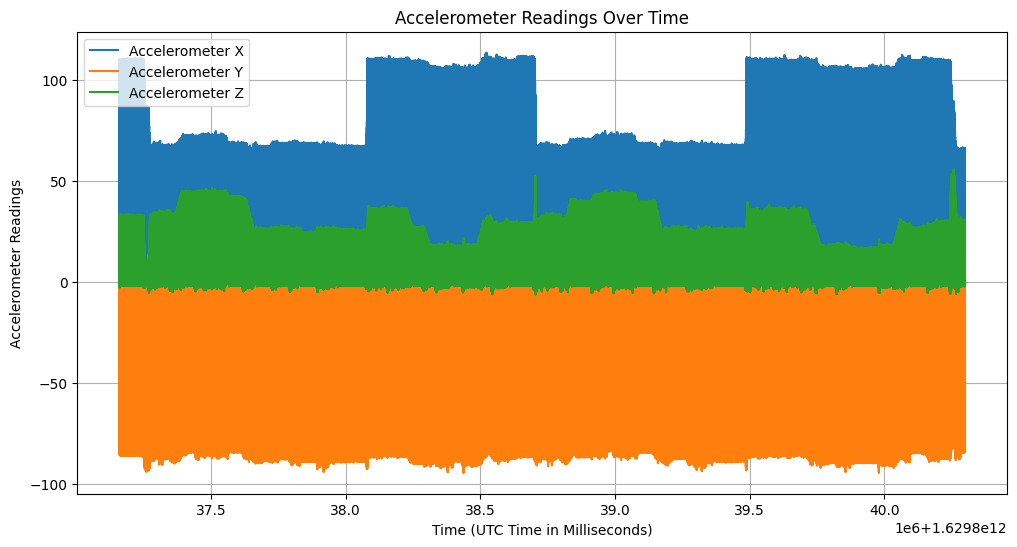

In [43]:
# Plot IMU data (you may want to choose specific columns for plotting)
plt.figure(figsize=(12, 6))
plt.plot(imu_data['utcTimeMillis'], imu_data['MeasurementX'], label='Accelerometer X')
plt.plot(imu_data['utcTimeMillis'], imu_data['MeasurementY'], label='Accelerometer Y')
plt.plot(imu_data['utcTimeMillis'], imu_data['MeasurementZ'], label='Accelerometer Z')
plt.xlabel('Time (UTC Time in Milliseconds)')
plt.ylabel('Accelerometer Readings')
plt.title('Accelerometer Readings Over Time')
plt.legend()
plt.grid()
plt.show()

In [44]:
# Extract relevant features
features = gnss_data[['Cn0DbHz', 'Svid', 'PseudorangeRateMetersPerSecond', 'ReceivedSvTimeNanos']]


In [45]:

# Handle missing values
features = features.dropna()




In [47]:
# Handle outliers (You can customize this based on your data and problem)
# Here, we replace outliers with the mean of the feature
def handle_outliers(series):
    mean = series.mean()
    std = series.std()
    series_copy = series.copy()  # Create a copy of the series
    series_copy[series - mean > 3 * std] = mean
    series_copy[mean - series > 3 * std] = mean
    return series_copy

for col in features.columns:
    features[col] = handle_outliers(features[col])


In [48]:
# Data transformations (if needed)
# For example, standardize the features (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the preprocessed features
preprocessed_data = pd.DataFrame(scaled_features, columns=features.columns)


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [50]:
# Split the data into features (X) and the target variable (y)
X = preprocessed_data[['Cn0DbHz', 'Svid', 'PseudorangeRateMetersPerSecond', 'ReceivedSvTimeNanos']]
y = ground_truth_data['LatitudeDegrees']  # Replace with your target variable


In [51]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [112833, 3139]

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)


In [ ]:
# Visualize the results (actual vs. predicted)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted (Linear Regression)")
plt.show()